In [1]:
import click
import json
from pathlib import Path
from pprint import pprint
from collections import defaultdict
import matplotlib.pyplot as plt



In [5]:
OUTPUT_PATH = "../outputs/output_bike_negotiation_collaborative_20250623_222631.json"

with open(OUTPUT_PATH, 'r', encoding='utf-8') as f:
    runs = json.load(f)
len(runs)

5

Agent: Buyer
Utilities: [0.0, 0.0, 0.0, 0.0, 0.0]
Agent: Seller
Utilities: [0.0, 0.0, 0.0, 0.0, 0.0]
Agent: InformationReturnAgent
Utilities: [0.0, 0.0, 0.0, 0.0, 0.0]


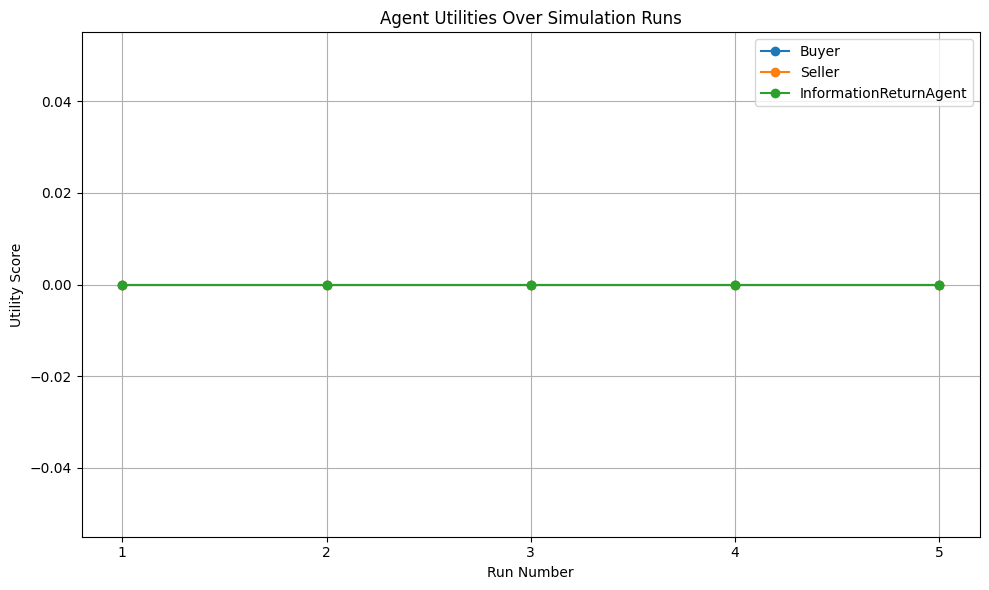

In [8]:
agent_to_utilities = defaultdict(list)
for run in runs:
    for agent_name, score in run['agent_utilities'].items():
        agent_to_utilities[agent_name].append(score)

for agent_name, utilities in agent_to_utilities.items():
    print(f"Agent: {agent_name}")
    print(f"Utilities: {utilities}")

# plot results over runs
plt.figure(figsize=(10, 6))
for agent_name, utilities in agent_to_utilities.items():
    plt.plot(range(1, len(utilities) + 1), utilities, marker='o', label=agent_name)
plt.title('Agent Utilities Over Simulation Runs')
plt.xlabel('Run Number')
plt.ylabel('Utility Score')
plt.xticks(range(1, len(runs) + 1))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Variable: final_price
Values: [0, 200, 0, 0, 0]
Variable: deal_reached
Values: [False, False, False, False, False]
Variable: negotiation_rounds
Values: [2, 2, 2, 2, 3]
Variable: buyer_satisfaction
Values: [10, 3, 2, 0, 2]
Variable: seller_satisfaction
Values: [90, 3, 8, 0, 8]


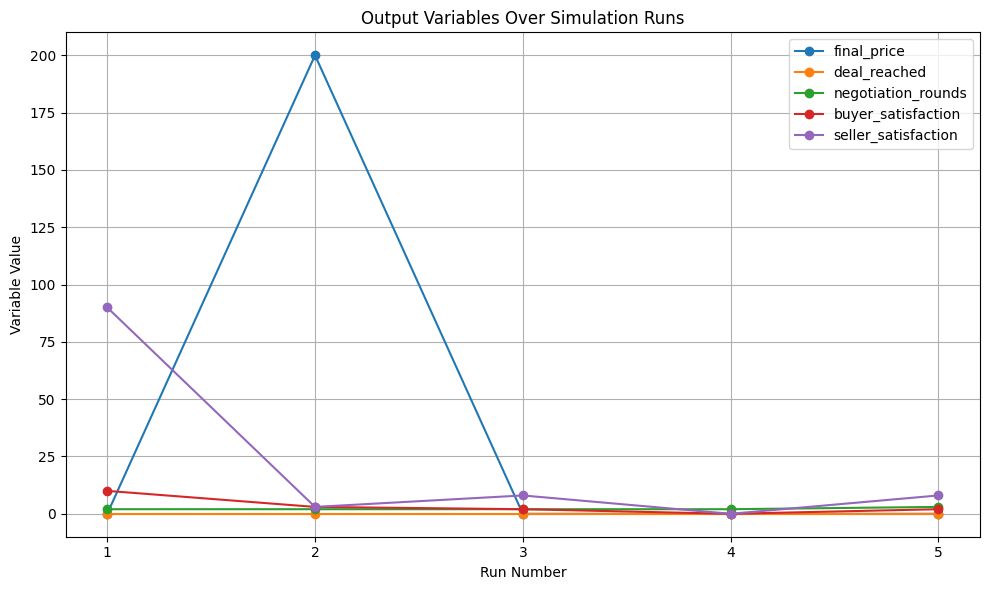

In [9]:
# plot output variables over runs
var_to_values = defaultdict(list)
for run in runs:
    for var in run['output_variables']:
        # if var value is numeric
        if isinstance(var['value'], (int, float)):
            var_to_values[var['name']].append(var['value'])
for var_name, values in var_to_values.items():
    print(f"Variable: {var_name}")
    print(f"Values: {values}")

plt.figure(figsize=(10, 6))
for var_name, values in var_to_values.items():
    plt.plot(range(1, len(values) + 1), values, marker='o', label=var_name)
plt.title('Output Variables Over Simulation Runs')
plt.xlabel('Run Number')
plt.ylabel('Variable Value')
plt.xticks(range(1, len(runs) + 1))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()